Task 2: Data Acquisition & Initial VIsualization

Load Data: Read the raw data into a Pandas DataFrame from your data/ folder.

In [98]:
# load data set 09288180_1980_2020.csv from data folder
import pandas as pd
streamflow_starvationres = pd.read_csv('../data/09288180_1980_2020.csv')

In [99]:
# load data set 09292000_1980_2020.csv from data folder
import pandas as pd
streamflow_yellowstone = pd.read_csv('../data/09292000_1980_2020.csv')


In [100]:
# load data set 09299500_1980_2020.csv from data folder
import pandas as pd
streamflow_whiterocks = pd.read_csv('../data/09299500_1980_2020.csv')

In [101]:
# load data set 09301500_1980_2020.csv from data folder
import pandas as pd
streamflow_uinta = pd.read_csv('../data/09301500_1980_2020.csv')

Process the data: Subset the data so that all of the data is overlapping and is 6 years in length.

In [107]:
# Function to set datetime index - handles different column names and structures
def set_datetime_index(df):
    """Convert datetime column to index, or verify index is already datetime"""
    # Check if index is already datetime-like
    if pd.api.types.is_datetime64_any_dtype(df.index):
        return df
    
    # Try common datetime column names
    datetime_cols = ['Datetime', 'datetime', 'Date', 'date', 'DATE', 'time', 'Time', 'TIME']
    for col in datetime_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])
            return df.set_index(col)
    
    # Check if index name suggests it's a datetime
    if df.index.name and 'date' in df.index.name.lower():
        return df
    
    # If we get here, try to convert index to datetime
    try:
        df.index = pd.to_datetime(df.index)
        return df
    except:
        pass
    
    # If all else fails, raise error
    raise ValueError(f"No datetime column found. Available columns: {df.columns.tolist()}, Index name: {df.index.name}")

# Apply to all four datasets
streamflow_starvationres = set_datetime_index(streamflow_starvationres)
streamflow_yellowstone = set_datetime_index(streamflow_yellowstone)
streamflow_whiterocks = set_datetime_index(streamflow_whiterocks)
streamflow_uinta = set_datetime_index(streamflow_uinta)

In [108]:
# slice all data sets to include data from 1999 to 2005
streamflow_starvationres_1999_2005 = streamflow_starvationres.loc['1999-01-01':'2005-12-31']
streamflow_yellowstone_1999_2005 = streamflow_yellowstone.loc['1999-01-01':'2005-12-31']
streamflow_whiterocks_1999_2005 = streamflow_whiterocks.loc['1999-01-01':'2005-12-31']  
streamflow_uinta_1999_2005 = streamflow_uinta.loc['1999-01-01':'2005-12-31']

Exploratory Data Analysis (EDA): Create an initial time-series plot of the data, ensure the plot has a title, axes labels, legend, etc. Create a figure with four subplots to visualize the data.

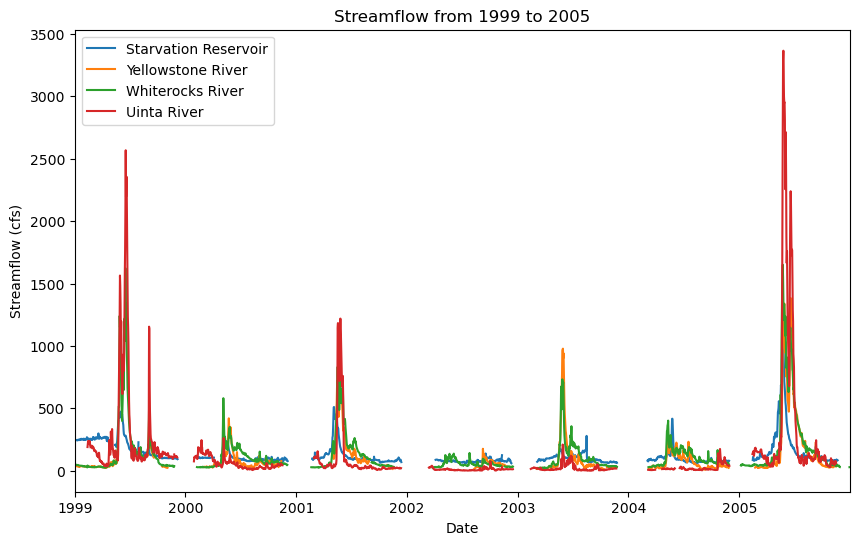

In [109]:
# create plot with all four data sets from 1999 through 2005
plt.figure(figsize=(10,6))
plt.plot(streamflow_starvationres_1999_2005["USGS_flow"], label="Starvation Reservoir")
plt.plot(streamflow_yellowstone_1999_2005["USGS_flow"], label="Yellowstone River")
plt.plot(streamflow_whiterocks_1999_2005["USGS_flow"], label="Whiterocks River")
plt.plot(streamflow_uinta_1999_2005["USGS_flow"], label="Uinta River")
plt.xlabel("Date")
plt.ylabel("Streamflow (cfs)")
plt.title("Streamflow from 1999 to 2005")
plt.legend()
plt.xlim(pd.to_datetime("1999-01-01"), pd.to_datetime("2005-12-31"))
plt.show()

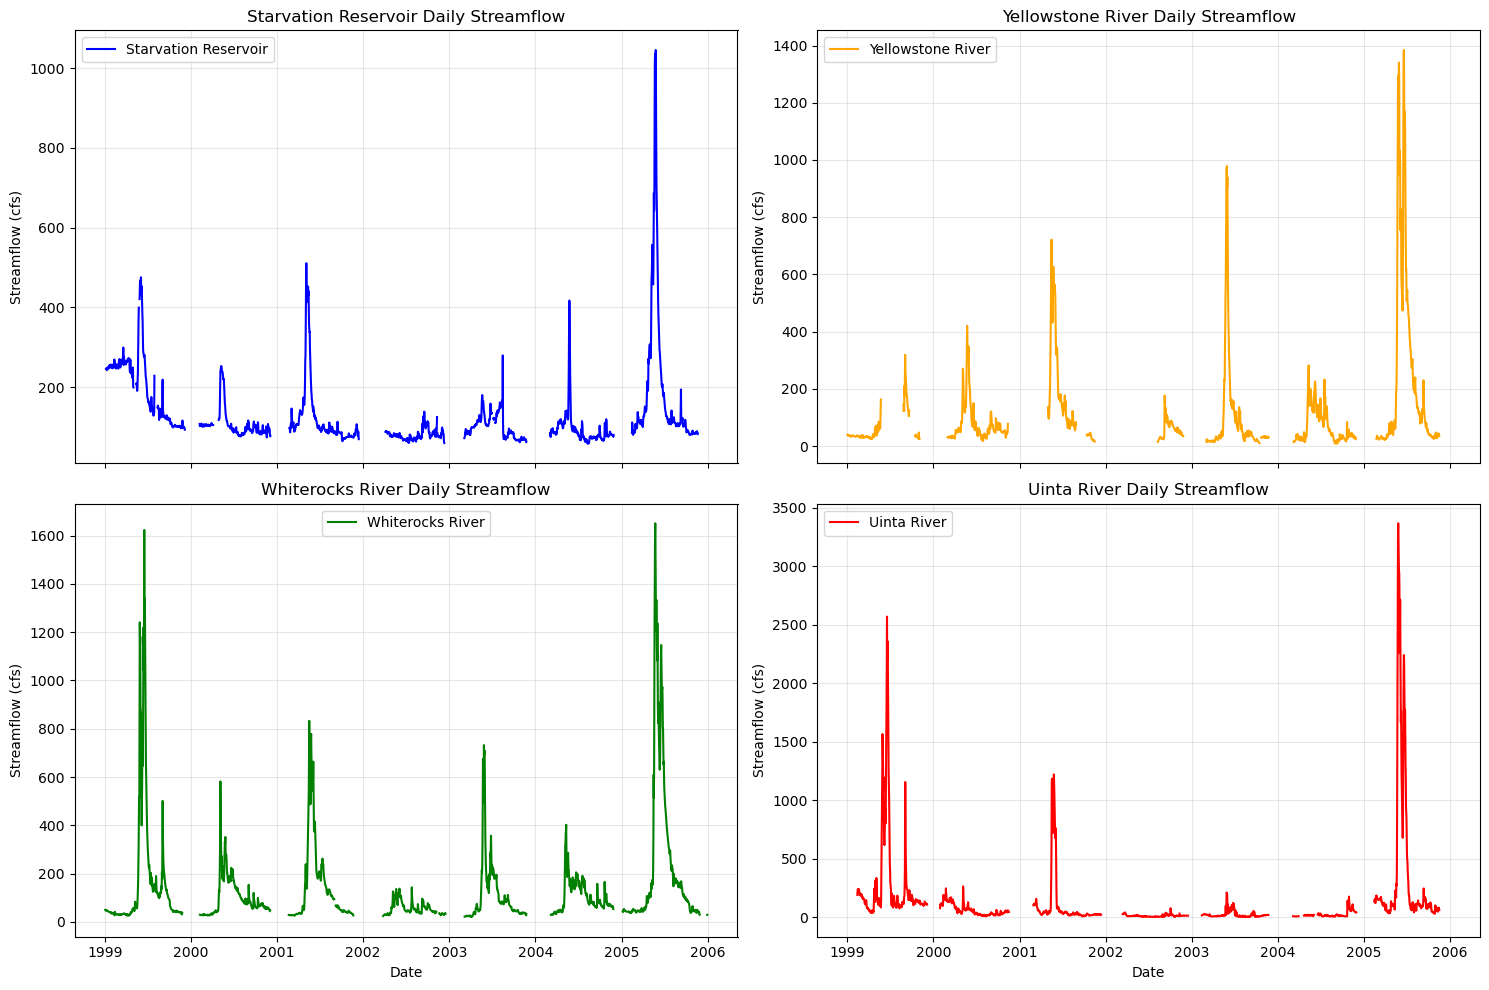

In [110]:
# Create 2x2 subplot grid with daily data for each dataset
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Plot 1: Starvation Reservoir
axs[0, 0].plot(streamflow_starvationres_1999_2005["USGS_flow"], label="Starvation Reservoir", color='blue')
axs[0, 0].set_title("Starvation Reservoir Daily Streamflow")
axs[0, 0].set_ylabel("Streamflow (cfs)")
axs[0, 0].legend()
axs[0, 0].grid(True, alpha=0.3)

# Plot 2: Yellowstone River
axs[0, 1].plot(streamflow_yellowstone_1999_2005["USGS_flow"], label="Yellowstone River", color='orange')
axs[0, 1].set_title("Yellowstone River Daily Streamflow")
axs[0, 1].set_ylabel("Streamflow (cfs)")
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

# Plot 3: Whiterocks River
axs[1, 0].plot(streamflow_whiterocks_1999_2005["USGS_flow"], label="Whiterocks River", color='green')
axs[1, 0].set_title("Whiterocks River Daily Streamflow")
axs[1, 0].set_ylabel("Streamflow (cfs)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].legend()
axs[1, 0].grid(True, alpha=0.3)

# Plot 4: Uinta River
axs[1, 1].plot(streamflow_uinta_1999_2005["USGS_flow"], label="Uinta River", color='red')
axs[1, 1].set_title("Uinta River Daily Streamflow")
axs[1, 1].set_ylabel("Streamflow (cfs)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].legend()
axs[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Task 3: Temporal Resampling & Statistical Aggregation

Weekly Mean: Resample the daily data to a Weekly mean.

In [111]:
# for each data set, resample to weekly averages    
streamflow_starvationres_weekly = streamflow_starvationres_1999_2005['USGS_flow'].resample('W').mean()
streamflow_yellowstone_weekly = streamflow_yellowstone_1999_2005['USGS_flow'].resample('W').mean()
streamflow_whiterocks_weekly = streamflow_whiterocks_1999_2005['USGS_flow'].resample('W').mean()
streamflow_uinta_weekly = streamflow_uinta_1999_2005['USGS_flow'].resample('W').mean()

Monthly Volumetric: Resample the data to a Monthly total.

In [113]:
# for each data set, resample to monthly totals 
streamflow_starvationres_monthly = streamflow_starvationres_1999_2005['USGS_flow'].resample('ME').sum()
streamflow_yellowstone_monthly = streamflow_yellowstone_1999_2005['USGS_flow'].resample('ME').sum()
streamflow_whiterocks_monthly = streamflow_whiterocks_1999_2005['USGS_flow'].resample('ME').sum()
streamflow_uinta_monthly = streamflow_uinta_1999_2005['USGS_flow'].resample('ME').sum()

Visualization: Create a single multip-paneled figure comparing the three resolutions

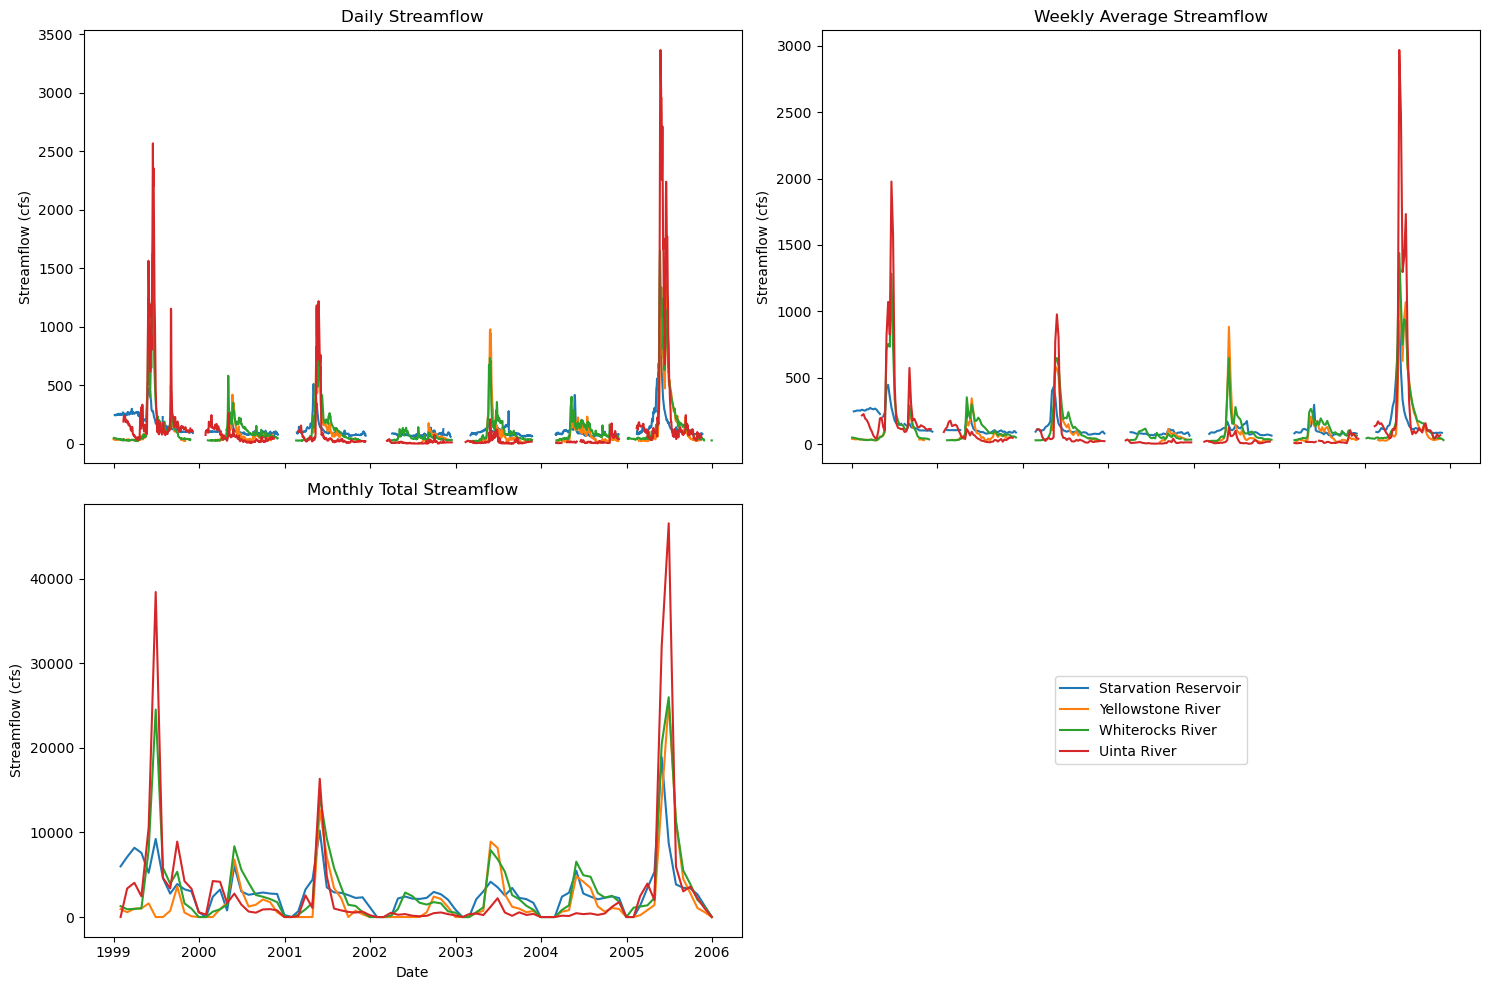

In [114]:
# create four subplots in a 2 by 2 grid, with the first subplot showing the daily streamflow for all four data sets, the second subplot showing the weekly average streamflow for all four data sets, the third subplot showing the monthly total streamflow for all four data sets, and the fourth subplot showing the legend for all four data sets
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs[0, 0].plot(streamflow_starvationres_1999_2005["USGS_flow"], label="Starvation Reservoir")
axs[0, 0].plot(streamflow_yellowstone_1999_2005["USGS_flow"], label="Yellowstone River")
axs[0, 0].plot(streamflow_whiterocks_1999_2005["USGS_flow"], label="Whiterocks River")
axs[0, 0].plot(streamflow_uinta_1999_2005["USGS_flow"], label="Uinta River")
axs[0, 0].set_title("Daily Streamflow")
axs[0, 0].set_ylabel("Streamflow (cfs)")
axs[0, 1].plot(streamflow_starvationres_weekly, label="Starvation Reservoir")  
axs[0, 1].plot(streamflow_yellowstone_weekly, label="Yellowstone River")
axs[0, 1].plot(streamflow_whiterocks_weekly, label="Whiterocks River")
axs[0, 1].plot(streamflow_uinta_weekly, label="Uinta River")
axs[0, 1].set_title("Weekly Average Streamflow")
axs[0, 1].set_ylabel("Streamflow (cfs)")
axs[1, 0].plot(streamflow_starvationres_monthly, label="Starvation Reservoir")
axs[1, 0].plot(streamflow_yellowstone_monthly, label="Yellowstone River")
axs[1, 0].plot(streamflow_whiterocks_monthly, label="Whiterocks River")
axs[1, 0].plot(streamflow_uinta_monthly, label="Uinta River")
axs[1, 0].set_title("Monthly Total Streamflow")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Streamflow (cfs)")

# get handles and labels from daily streamflow plot and display in the fourth subplot
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[1, 1].legend(handles, labels, loc='center')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

Task 4: Comparative Analysis

Aggregation (wet year): within your plotting function to show off the range of flow for each dataset (e.g. min/max for each day), and plot the wet year of interest for each stream

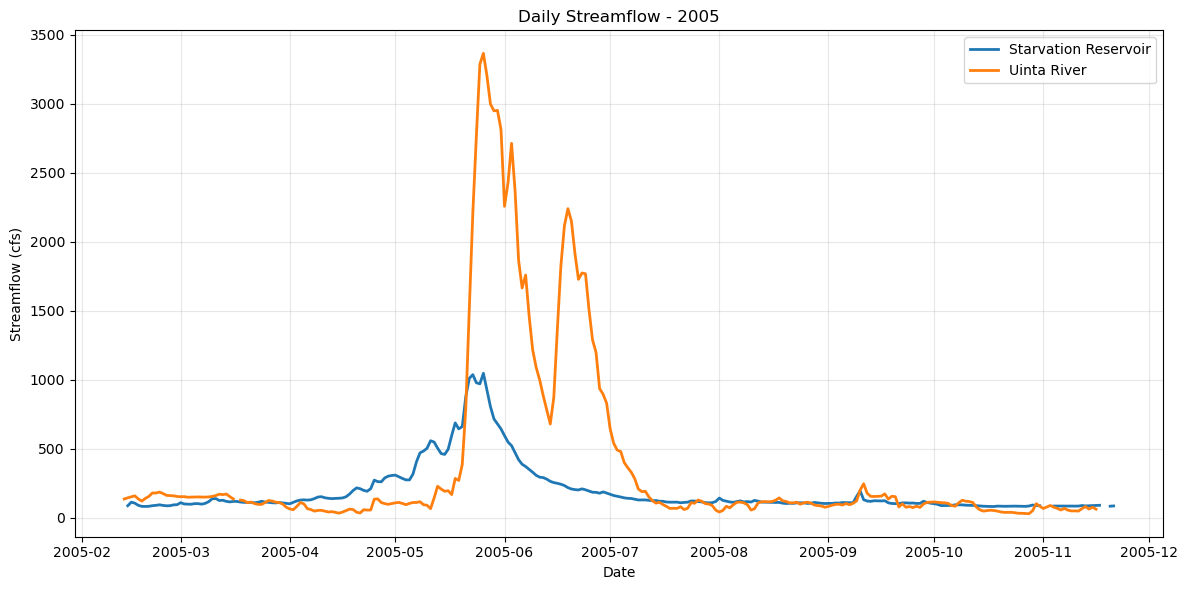

In [115]:
# Plot Starvation Reservoir and Uinta River daily data for 2005
fig, ax = plt.subplots(figsize=(12, 6))

# Filter data to 2005 only
starvation_2005 = streamflow_starvationres.loc['2005-01-01':'2005-12-31']
uinta_2005 = streamflow_uinta.loc['2005-01-01':'2005-12-31']

# Plot both datasets
ax.plot(starvation_2005["USGS_flow"], label="Starvation Reservoir", linewidth=2)
ax.plot(uinta_2005["USGS_flow"], label="Uinta River", linewidth=2)

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Streamflow (cfs)")
ax.set_title("Daily Streamflow - 2005")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Aggregation (dry year): within your plotting function to show the range of flow for each dataset (e.g. min/max for each day), and plot the dry year of interest

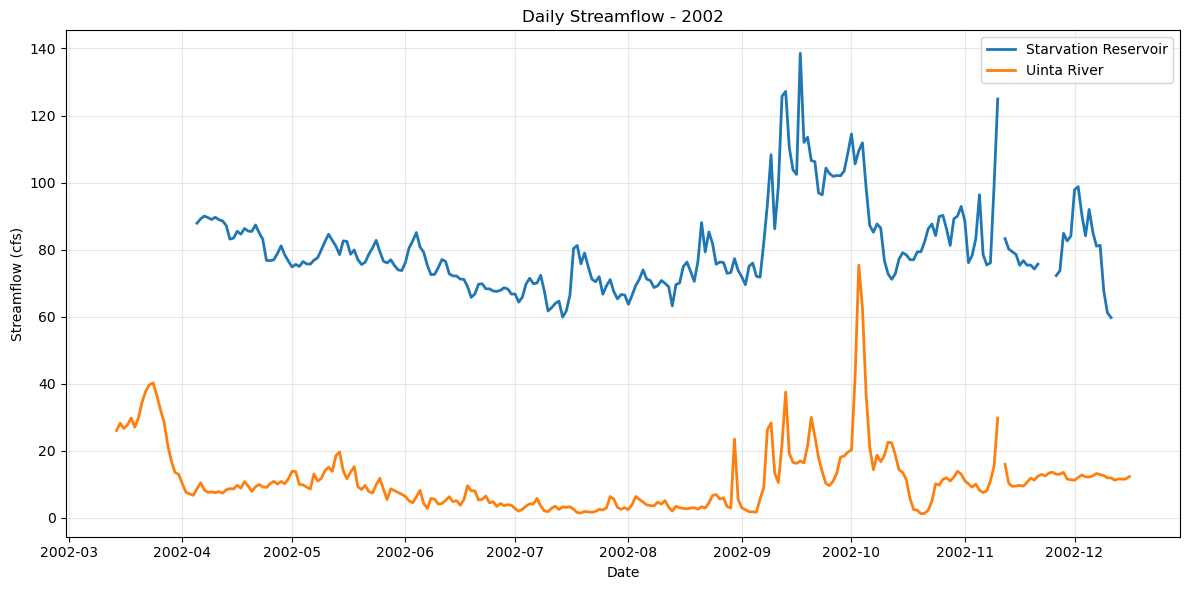

In [116]:
# Plot Starvation Reservoir and Uinta River daily data for 2002
fig, ax = plt.subplots(figsize=(12, 6))

# Filter data to 2002 only
starvation_2002 = streamflow_starvationres.loc['2002-01-01':'2002-12-31']
uinta_2002 = streamflow_uinta.loc['2002-01-01':'2002-12-31']

# Plot both datasets
ax.plot(starvation_2002["USGS_flow"], label="Starvation Reservoir", linewidth=2)
ax.plot(uinta_2002["USGS_flow"], label="Uinta River", linewidth=2)

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Streamflow (cfs)")
ax.set_title("Daily Streamflow - 2002")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()